In [1]:
from emcee.backends import HDFBackend
from corner import corner

from sampling import create_model, binom_pmf

In [2]:
model = create_model("../data/filtered.csv")

In [3]:
backend = HDFBackend("../models/midline.hdf5", read_only=True)
samples = backend.get_chain(discard=1900, flat=True)

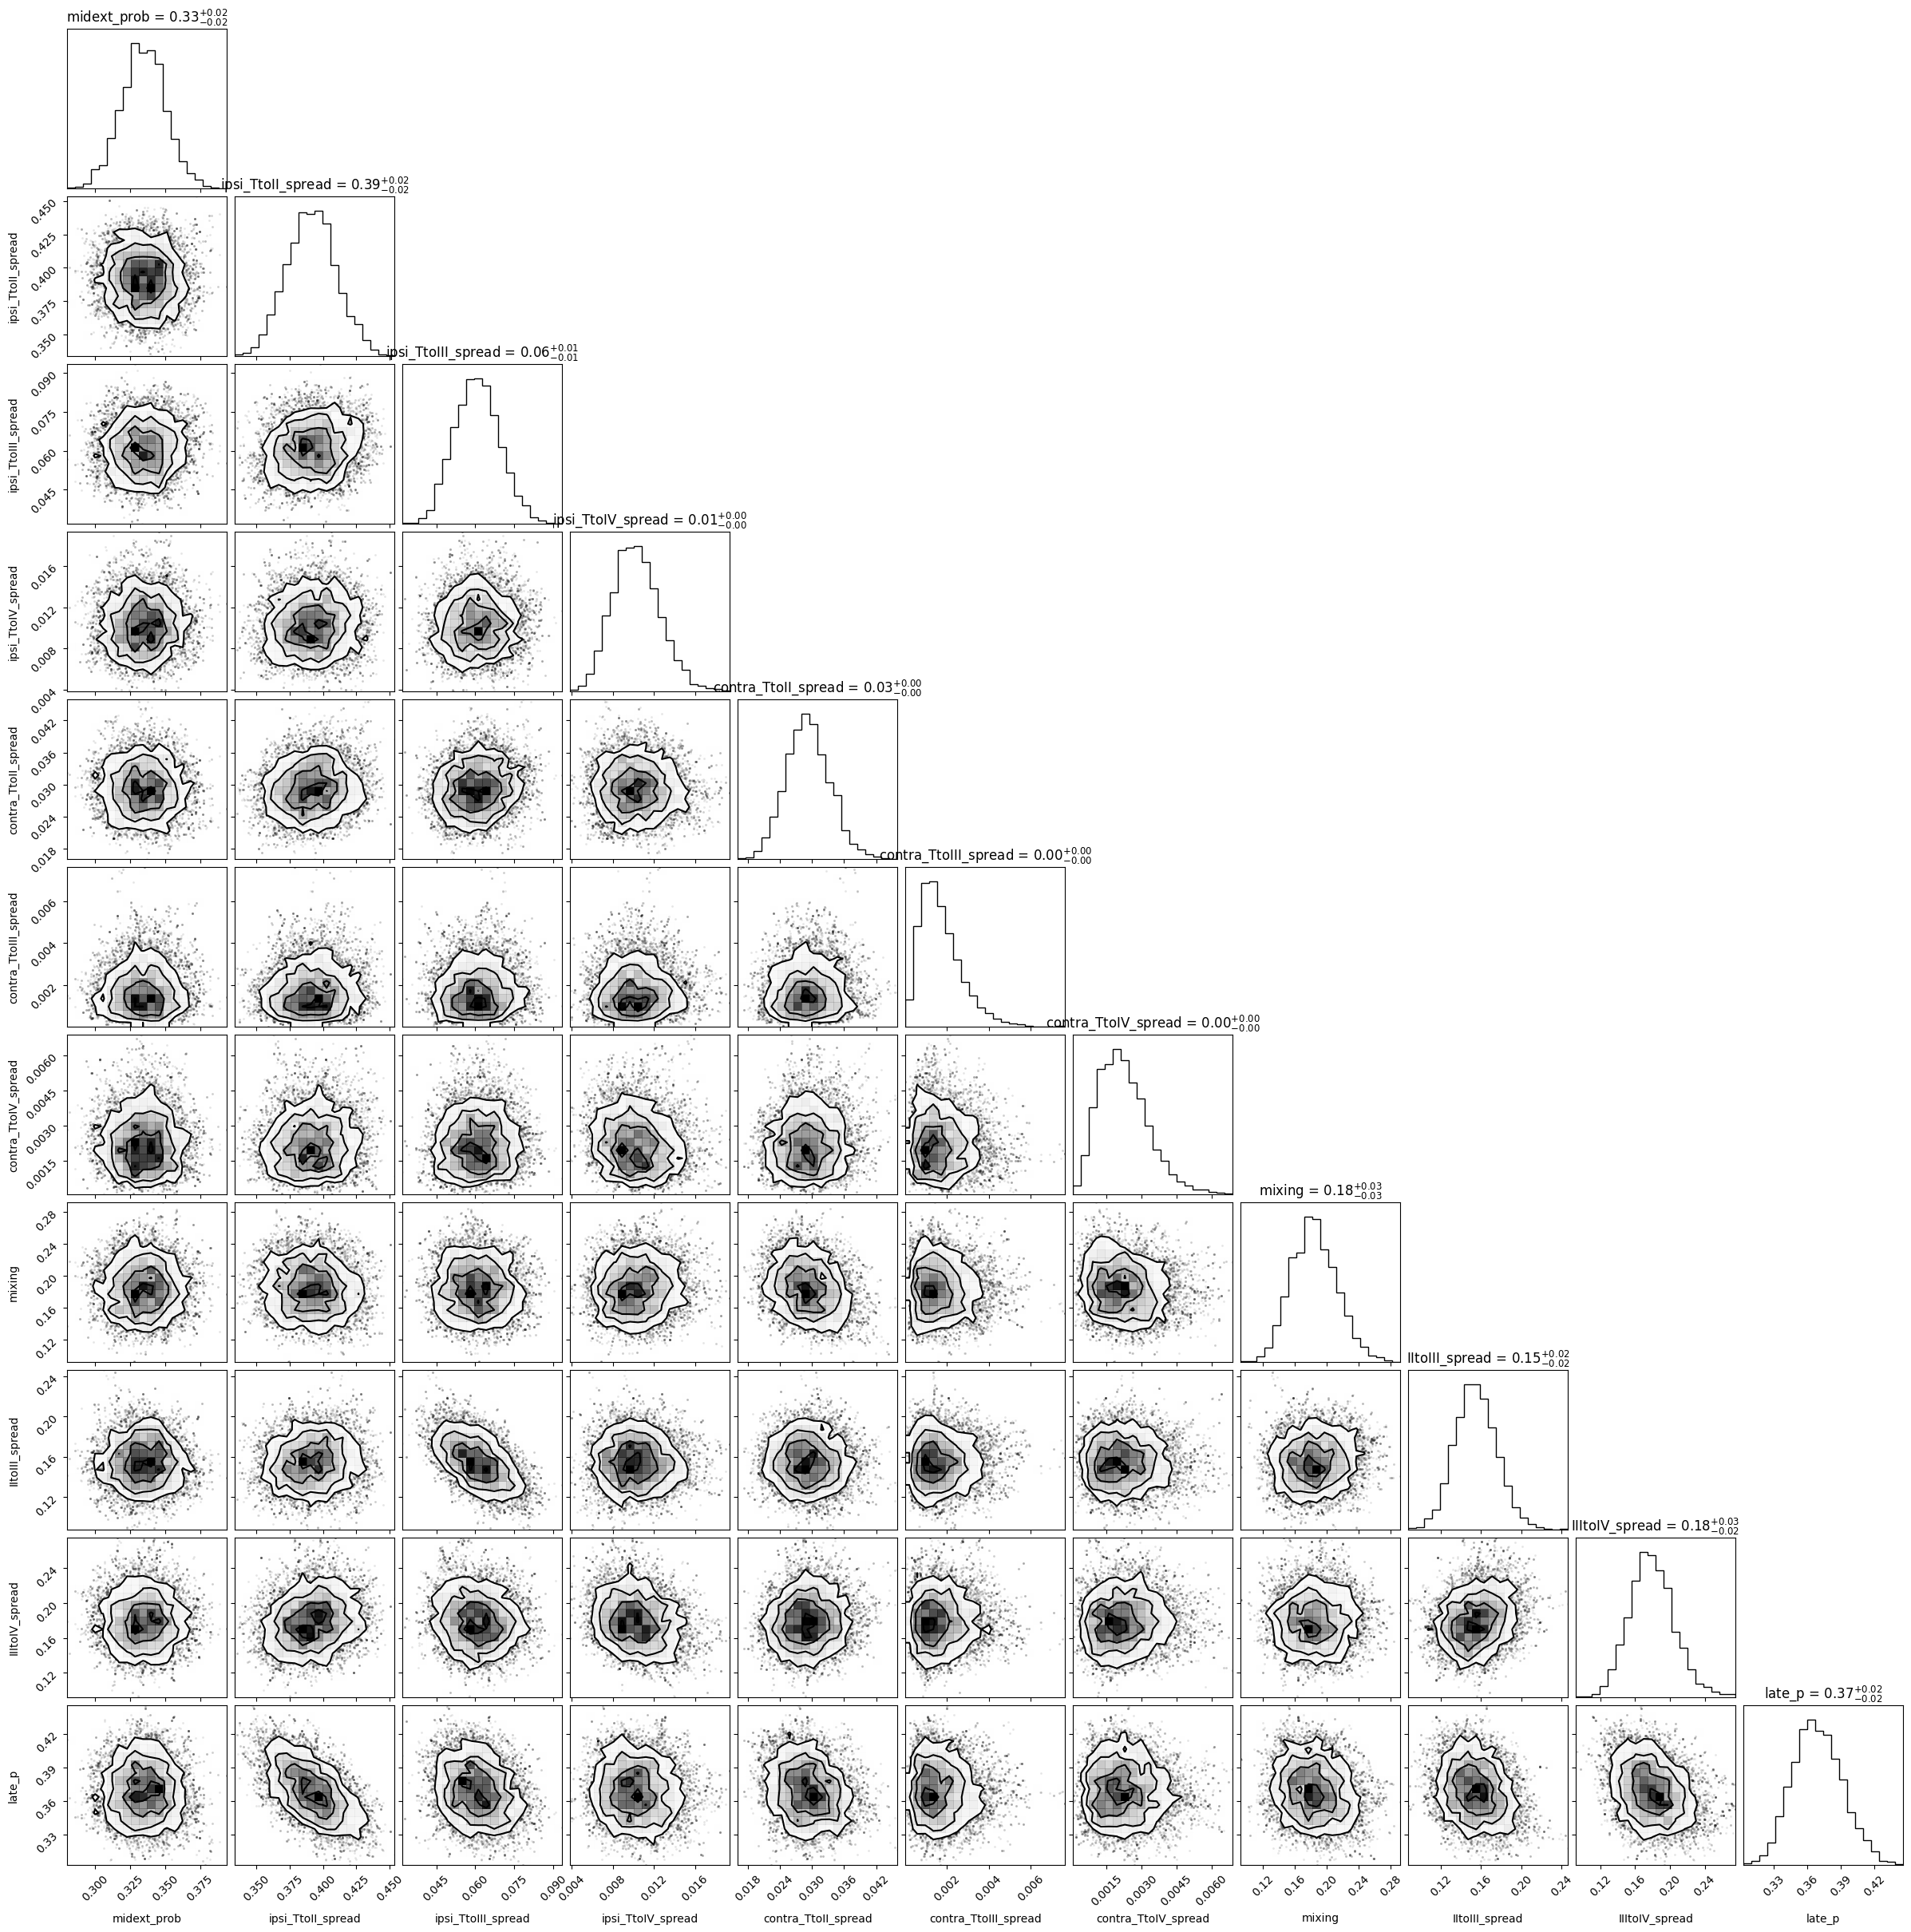

In [4]:
corner(samples, labels=list(model.get_params().keys()), show_titles=True);

In [5]:
model.set_params(*samples.mean(axis=0));
model.get_params()

{'midext_prob': 0.3345405018780217,
 'ipsi_TtoII_spread': 0.39158016516604094,
 'ipsi_TtoIII_spread': 0.06076657296371224,
 'ipsi_TtoIV_spread': 0.01031874337235789,
 'contra_TtoII_spread': 0.029260003466990255,
 'contra_TtoIII_spread': 0.0017371198431367122,
 'contra_TtoIV_spread': 0.002261222046251275,
 'mixing': 0.18455757946371137,
 'IItoIII_spread': 0.15481224640482596,
 'IIItoIV_spread': 0.1796695707489384,
 'late_p': 0.36911163061469904}

In [6]:
model.midext_prob

0.3345405018780217

In [22]:
t = None

100 * len(model.ext.ipsi.data_matrix(t)) / (
    len(model.noext.ipsi.data_matrix(t)) + len(model.ext.ipsi.data_matrix(t))
)

25.802139037433154

In [8]:
backend = HDFBackend("../models/midline_with_unknown.hdf5", read_only=True)
samples = backend.get_chain(discard=1900, flat=True)

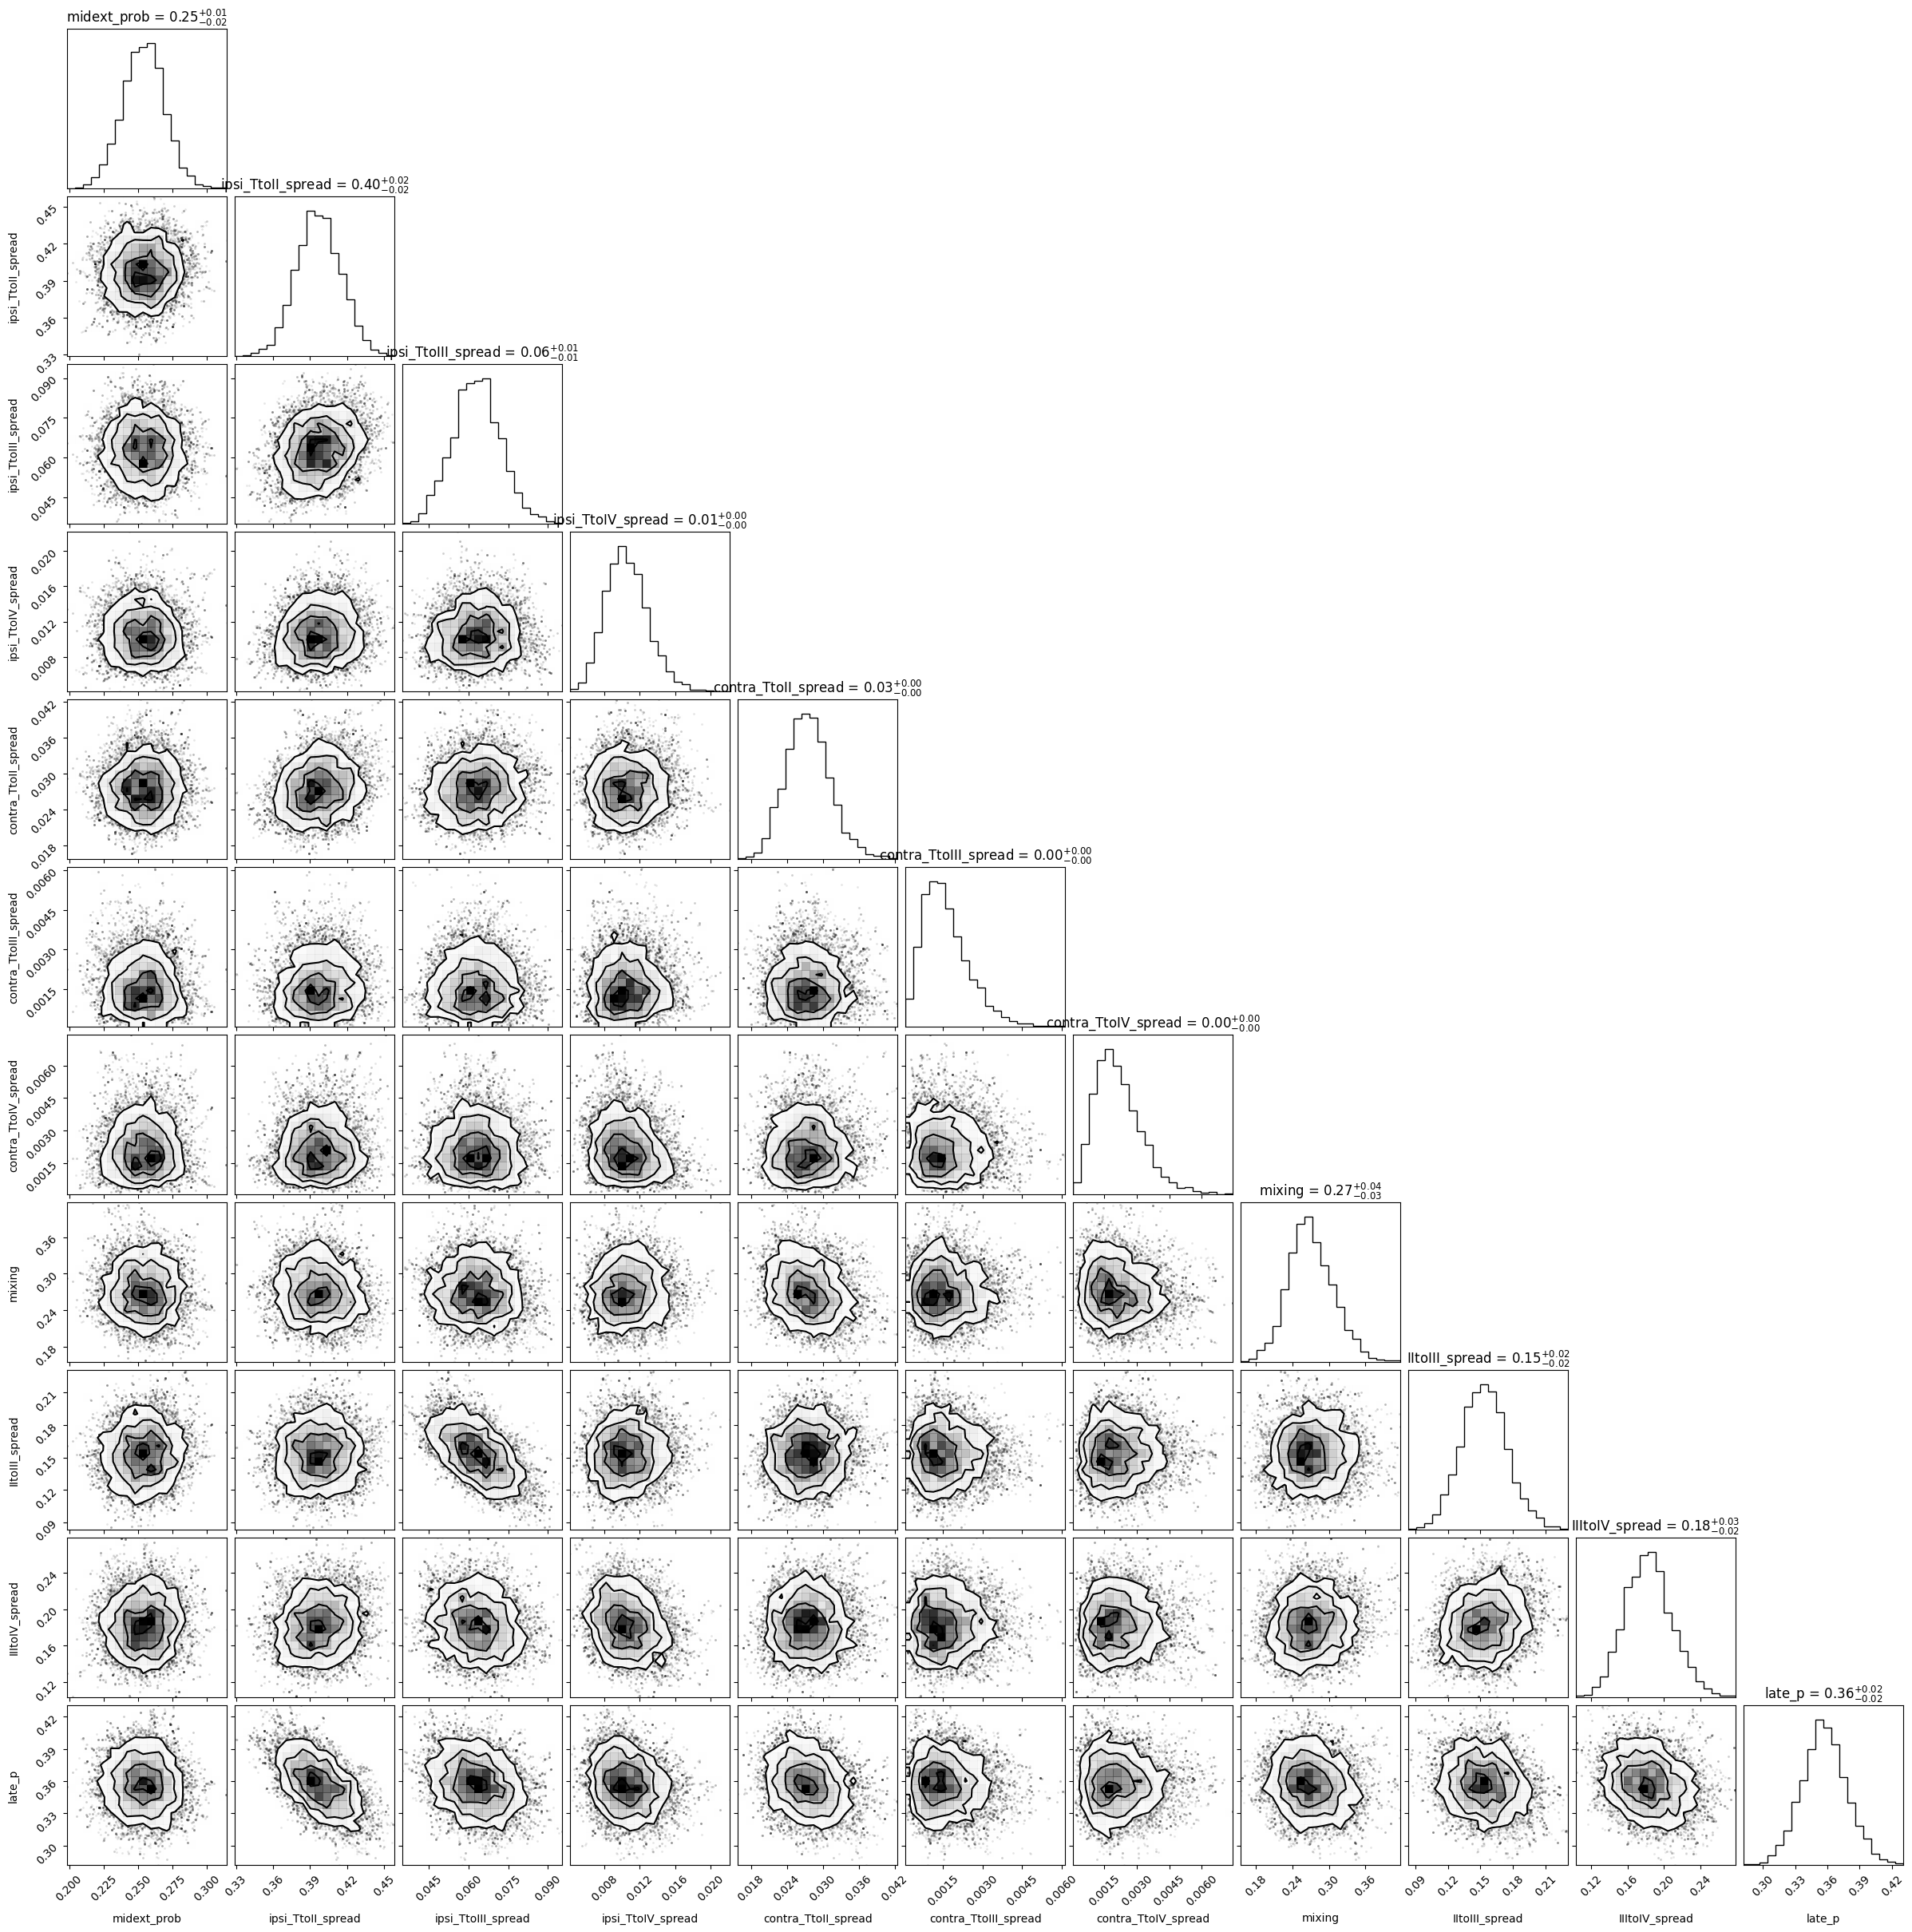

In [9]:
corner(samples, labels=list(model.get_params().keys()), show_titles=True);

In [12]:
model.set_params(*samples.mean(axis=0))
model.get_params()

{'midext_prob': 0.2540480001454871,
 'ipsi_TtoII_spread': 0.3969721545781523,
 'ipsi_TtoIII_spread': 0.06313982052890746,
 'ipsi_TtoIV_spread': 0.010576511845109212,
 'contra_TtoII_spread': 0.027565563740993386,
 'contra_TtoIII_spread': 0.0016178710628564992,
 'contra_TtoIV_spread': 0.0021703791881825412,
 'mixing': 0.27084592063607926,
 'IItoIII_spread': 0.15367422021105626,
 'IIItoIV_spread': 0.18345617212486084,
 'late_p': 0.35730828915003104}

In [13]:
model.get_distribution("early").pmf @ model.midext_evo()

array([0.45259722, 0.54740278])

In [14]:
model.get_distribution("late").pmf @ model.midext_evo()

array([0.3861189, 0.6138811])

In [16]:
model.midext_evo()

array([[1.        , 0.        ],
       [0.745952  , 0.254048  ],
       [0.55644439, 0.44355561],
       [0.4150808 , 0.5849192 ],
       [0.30963035, 0.69036965],
       [0.23096938, 0.76903062],
       [0.17229207, 0.82770793],
       [0.12852162, 0.87147838],
       [0.09587096, 0.90412904],
       [0.07151513, 0.92848487],
       [0.05334686, 0.94665314]])

In [23]:
backend = HDFBackend("../models/midline_with_evo.hdf5", read_only=True)
samples = backend.get_chain(discard=1900, flat=True)

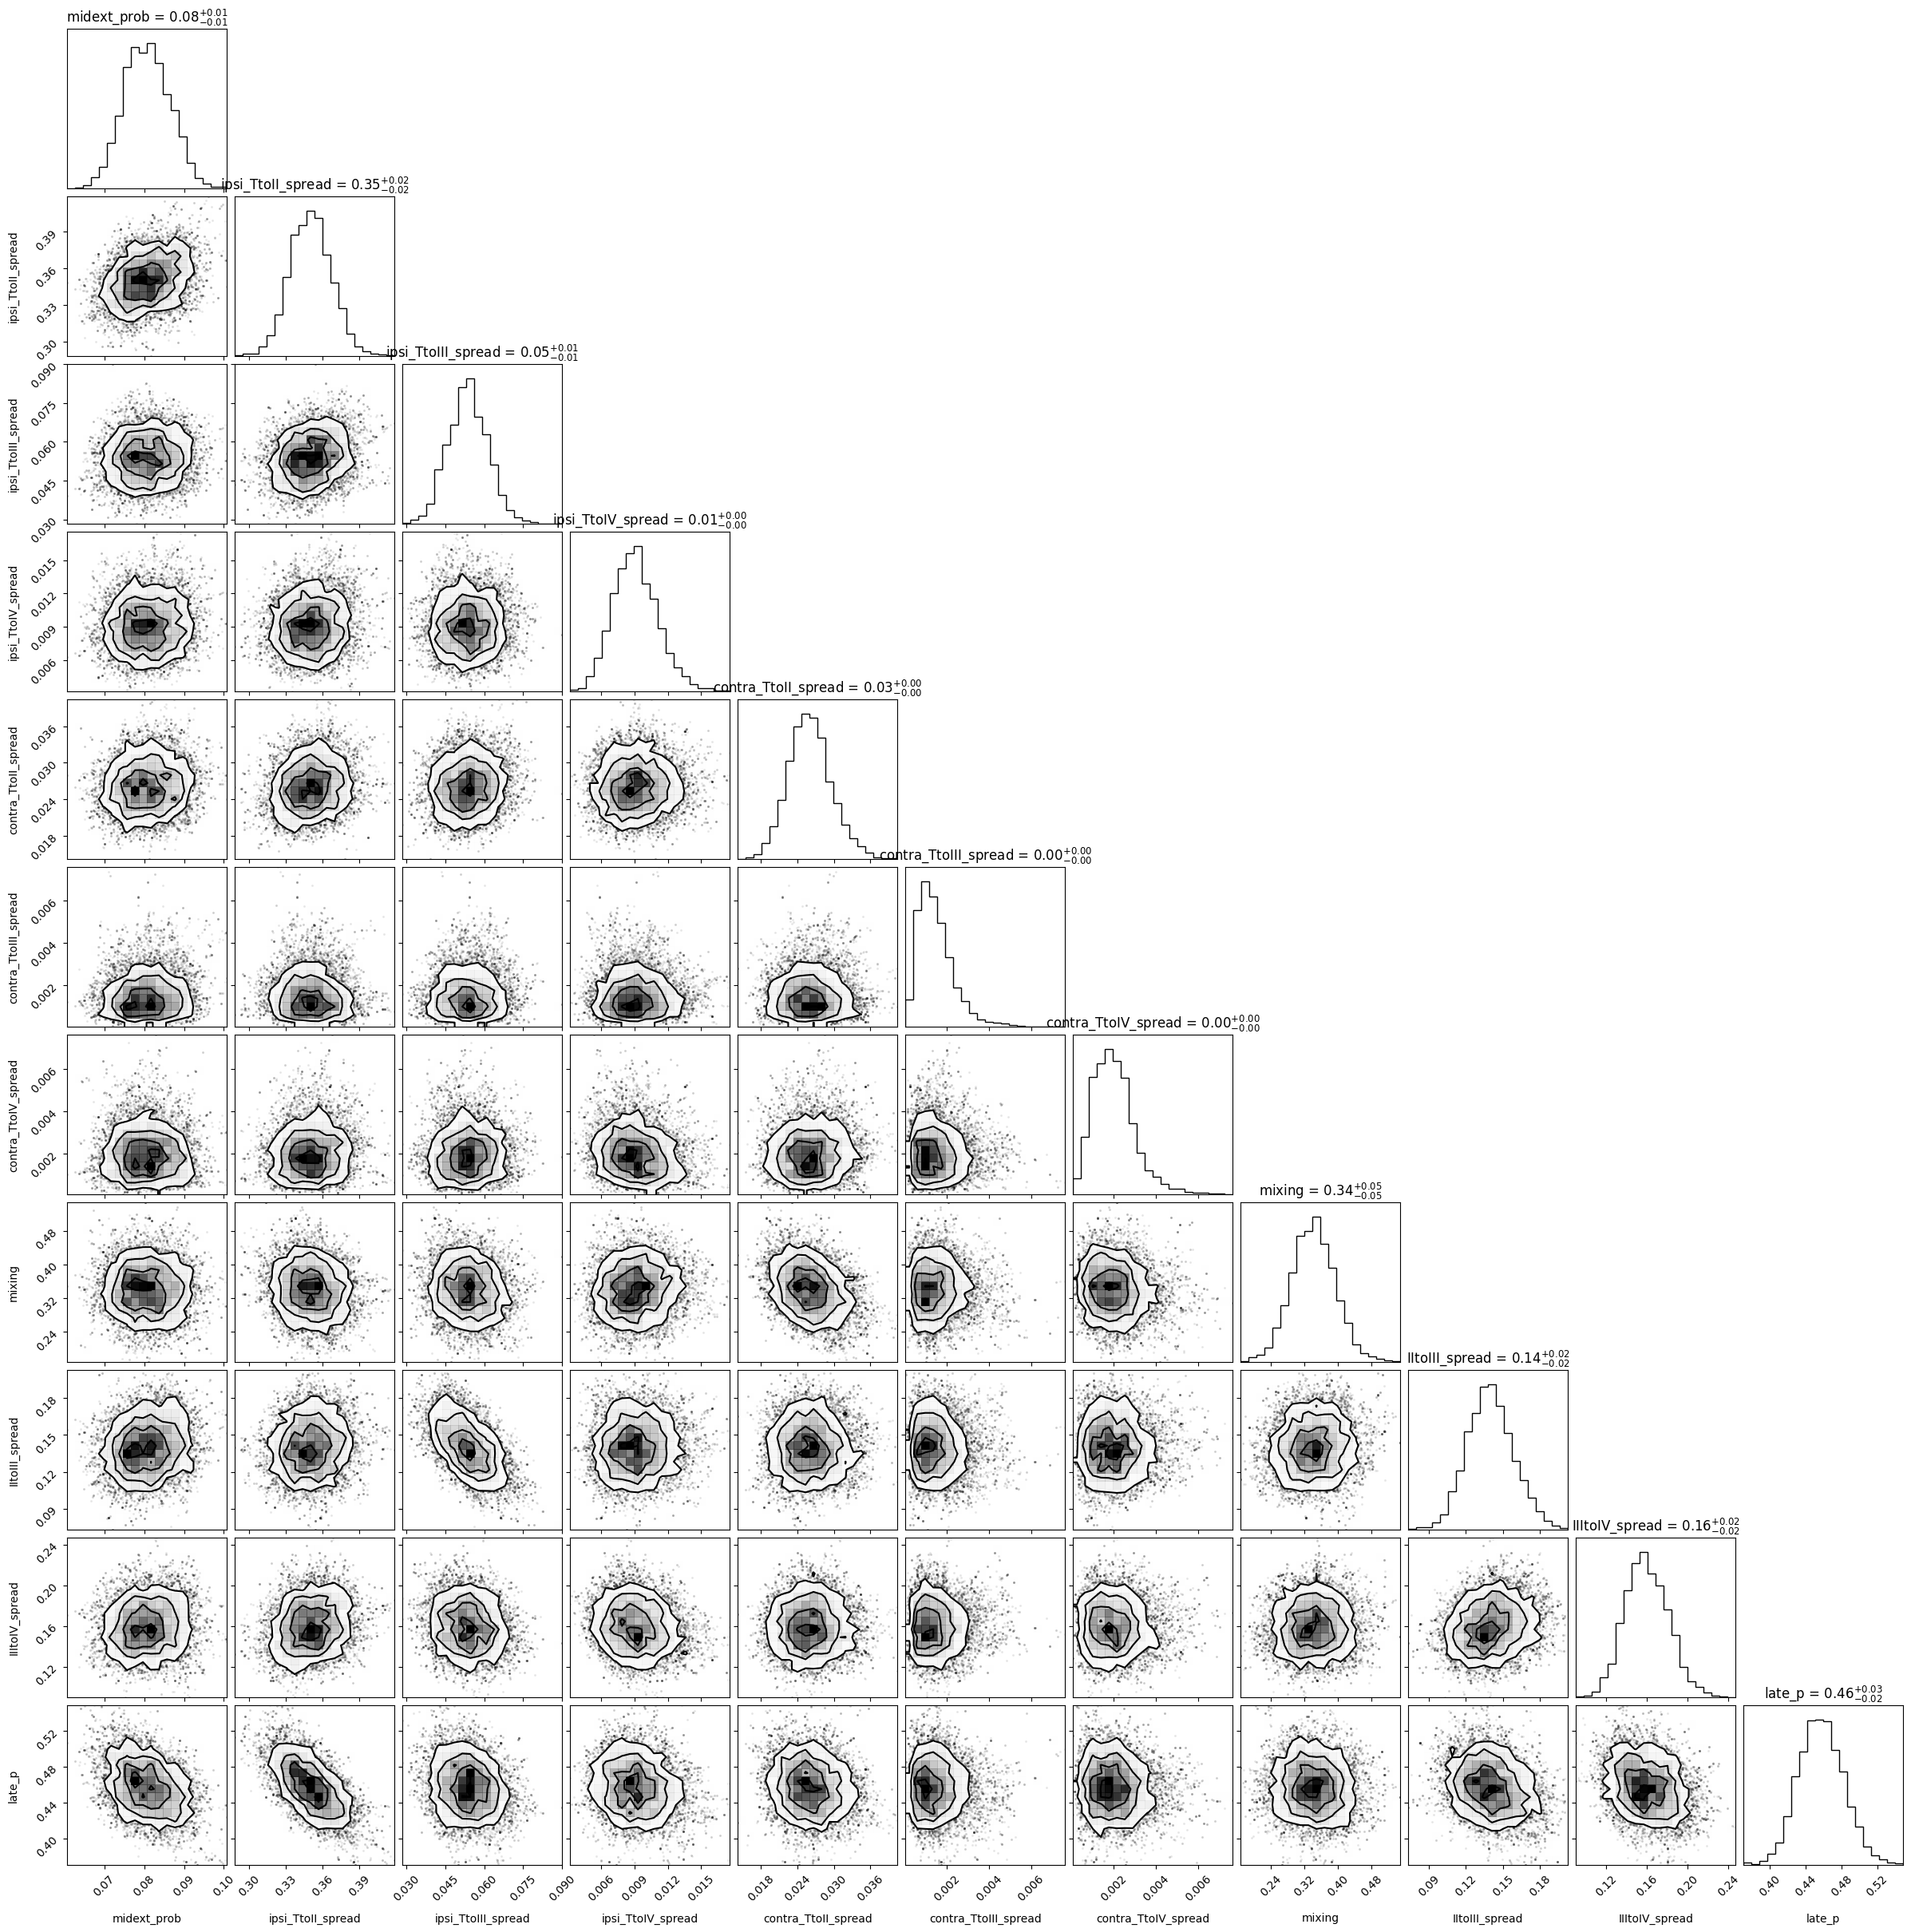

In [24]:
corner(samples, labels=list(model.get_params().keys()), show_titles=True);

In [25]:
model.set_params(*samples.mean(axis=0))
model.get_params()

{'midext_prob': 0.08071420045543036,
 'ipsi_TtoII_spread': 0.3504452556801924,
 'ipsi_TtoIII_spread': 0.05370938926514247,
 'ipsi_TtoIV_spread': 0.009125644741956474,
 'contra_TtoII_spread': 0.026094623545372612,
 'contra_TtoIII_spread': 0.0014913218689105948,
 'contra_TtoIV_spread': 0.0020264318494846553,
 'mixing': 0.34138344046887076,
 'IItoIII_spread': 0.14003680249719444,
 'IIItoIV_spread': 0.1599660912329731,
 'late_p': 0.4575535828460134}

In [26]:
model.get_distribution("early").pmf @ model.midext_evo()

array([0.7826087, 0.2173913])

In [27]:
model.get_distribution("late").pmf @ model.midext_evo()

array([0.68639437, 0.31360563])